In [2]:
# data extraction from https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files/23378284#23378284
import numpy as np
from scipy.io import wavfile

sample_rate, data = wavfile.read('data/c_test.wav')
# wf for waveform
wf = data.T[0] / max(abs(data.T[0]))
len(wf)
print(sample_rate)

44100


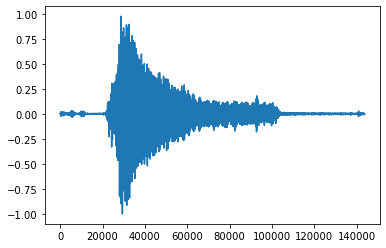

In [3]:
import matplotlib.pyplot as plt
plt.plot(wf);

# First, obtain dictionary mapping frequencies to notes

In [4]:
import pandas as pd
df = pd.read_csv('data/f_to_note.csv', index_col = 'f')
f_list = list(df.index)
f_to_note = df.to_dict()['note']


In [5]:
def get_note(freq):
    """
    Takes in frequency in Hz, and outputs the closest note
    """
    # just load in values directly...
    f_to_note = {16.35: 'C0', 17.32: 'C#0/Db0', 18.35: 'D0', 19.45: 'D#0/Eb0', 20.6: 'E0', 21.83: 'F0', 23.12: 'F#0/Gb0', 24.5: 'G0', 25.96: 'G#0/Ab0', 27.5: 'A0', 29.14: 'A#0/Bb0', 30.87: 'B0', 32.7: 'C1', 34.65: 'C#1/Db1', 36.71: 'D1', 38.89: 'D#1/Eb1', 41.2: 'E1', 43.65: 'F1', 46.25: 'F#1/Gb1', 49.0: 'G1', 51.91: 'G#1/Ab1', 55.0: 'A1', 58.27: 'A#1/Bb1', 61.74: 'B1', 65.41: 'C2', 69.3: 'C#2/Db2', 73.42: 'D2', 77.78: 'D#2/Eb2', 82.41: 'E2', 87.31: 'F2', 92.5: 'F#2/Gb2', 98.0: 'G2', 103.83: 'G#2/Ab2', 110.0: 'A2', 116.54: 'A#2/Bb2', 123.47: 'B2', 130.81: 'C3', 138.59: 'C#3/Db3', 146.83: 'D3', 155.56: 'D#3/Eb3', 164.81: 'E3', 174.61: 'F3', 185.0: 'F#3/Gb3', 196.0: 'G3', 207.65: 'G#3/Ab3', 220.0: 'A3', 233.08: 'A#3/Bb3', 246.94: 'B3', 261.63: 'C4', 277.18: 'C#4/Db4', 293.66: 'D4', 311.13: 'D#4/Eb4', 329.63: 'E4', 349.23: 'F4', 369.99: 'F#4/Gb4', 392.0: 'G4', 415.3: 'G#4/Ab4', 440.0: 'A4', 466.16: 'A#4/Bb4', 493.88: 'B4', 523.25: 'C5', 554.37: 'C#5/Db5', 587.33: 'D5', 622.25: 'D#5/Eb5', 659.25: 'E5', 698.46: 'F5', 739.99: 'F#5/Gb5', 783.99: 'G5', 830.61: 'G#5/Ab5', 880.0: 'A5', 932.33: 'A#5/Bb5', 987.77: 'B5', 1046.5: 'C6', 1108.73: 'C#6/Db6', 1174.66: 'D6', 1244.51: 'D#6/Eb6', 1318.51: 'E6', 1396.91: 'F6', 1479.98: 'F#6/Gb6', 1567.98: 'G6', 1661.22: 'G#6/Ab6', 1760.0: 'A6', 1864.66: 'A#6/Bb6', 1975.53: 'B6', 2093.0: 'C7', 2217.46: 'C#7/Db7', 2349.32: 'D7', 2489.02: 'D#7/Eb7', 2637.02: 'E7', 2793.83: 'F7', 2959.96: 'F#7/Gb7', 3135.96: 'G7', 3322.44: 'G#7/Ab7', 3520.0: 'A7', 3729.31: 'A#7/Bb7', 3951.07: 'B7', 4186.01: 'C8', 4434.92: 'C#8/Db8', 4698.63: 'D8', 4978.03: 'D#8/Eb8', 5274.04: 'E8', 5587.65: 'F8', 5919.91: 'F#8/Gb8', 6271.93: 'G8', 6644.88: 'G#8/Ab8', 7040.0: 'A8', 7458.62: 'A#8/Bb8', 7902.13: 'B8'}
    f_list = [16.35, 17.32, 18.35, 19.45, 20.6, 21.83, 23.12, 24.5, 25.96, 27.5, 29.14, 30.87, 32.7, 34.65, 36.71, 38.89, 41.2, 43.65, 46.25, 49.0, 51.91, 55.0, 58.27, 61.74, 65.41, 69.3, 73.42, 77.78, 82.41, 87.31, 92.5, 98.0, 103.83, 110.0, 116.54, 123.47, 130.81, 138.59, 146.83, 155.56, 164.81, 174.61, 185.0, 196.0, 207.65, 220.0, 233.08, 246.94, 261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.0, 415.3, 440.0, 466.16, 493.88, 523.25, 554.37, 587.33, 622.25, 659.25, 698.46, 739.99, 783.99, 830.61, 880.0, 932.33, 987.77, 1046.5, 1108.73, 1174.66, 1244.51, 1318.51, 1396.91, 1479.98, 1567.98, 1661.22, 1760.0, 1864.66, 1975.53, 2093.0, 2217.46, 2349.32, 2489.02, 2637.02, 2793.83, 2959.96, 3135.96, 3322.44, 3520.0, 3729.31, 3951.07, 4186.01, 4434.92, 4698.63, 4978.03, 5274.04, 5587.65, 5919.91, 6271.93, 6644.88, 7040.0, 7458.62, 7902.13]
    closest_freq_idx = np.argmin(list(map(lambda x: abs(x - freq), f_list)))
    note = f_to_note[f_list[closest_freq_idx]]
    return note

In [9]:
# clean up dict to more desireable format
f_to_note = {16.35: 'C0', 17.32: 'C#0/Db0', 18.35: 'D0', 19.45: 'D#0/Eb0', 20.6: 'E0', 21.83: 'F0', 23.12: 'F#0/Gb0', 24.5: 'G0', 25.96: 'G#0/Ab0', 27.5: 'A0', 29.14: 'A#0/Bb0', 30.87: 'B0', 32.7: 'C1', 34.65: 'C#1/Db1', 36.71: 'D1', 38.89: 'D#1/Eb1', 41.2: 'E1', 43.65: 'F1', 46.25: 'F#1/Gb1', 49.0: 'G1', 51.91: 'G#1/Ab1', 55.0: 'A1', 58.27: 'A#1/Bb1', 61.74: 'B1', 65.41: 'C2', 69.3: 'C#2/Db2', 73.42: 'D2', 77.78: 'D#2/Eb2', 82.41: 'E2', 87.31: 'F2', 92.5: 'F#2/Gb2', 98.0: 'G2', 103.83: 'G#2/Ab2', 110.0: 'A2', 116.54: 'A#2/Bb2', 123.47: 'B2', 130.81: 'C3', 138.59: 'C#3/Db3', 146.83: 'D3', 155.56: 'D#3/Eb3', 164.81: 'E3', 174.61: 'F3', 185.0: 'F#3/Gb3', 196.0: 'G3', 207.65: 'G#3/Ab3', 220.0: 'A3', 233.08: 'A#3/Bb3', 246.94: 'B3', 261.63: 'C4', 277.18: 'C#4/Db4', 293.66: 'D4', 311.13: 'D#4/Eb4', 329.63: 'E4', 349.23: 'F4', 369.99: 'F#4/Gb4', 392.0: 'G4', 415.3: 'G#4/Ab4', 440.0: 'A4', 466.16: 'A#4/Bb4', 493.88: 'B4', 523.25: 'C5', 554.37: 'C#5/Db5', 587.33: 'D5', 622.25: 'D#5/Eb5', 659.25: 'E5', 698.46: 'F5', 739.99: 'F#5/Gb5', 783.99: 'G5', 830.61: 'G#5/Ab5', 880.0: 'A5', 932.33: 'A#5/Bb5', 987.77: 'B5', 1046.5: 'C6', 1108.73: 'C#6/Db6', 1174.66: 'D6', 1244.51: 'D#6/Eb6', 1318.51: 'E6', 1396.91: 'F6', 1479.98: 'F#6/Gb6', 1567.98: 'G6', 1661.22: 'G#6/Ab6', 1760.0: 'A6', 1864.66: 'A#6/Bb6', 1975.53: 'B6', 2093.0: 'C7', 2217.46: 'C#7/Db7', 2349.32: 'D7', 2489.02: 'D#7/Eb7', 2637.02: 'E7', 2793.83: 'F7', 2959.96: 'F#7/Gb7', 3135.96: 'G7', 3322.44: 'G#7/Ab7', 3520.0: 'A7', 3729.31: 'A#7/Bb7', 3951.07: 'B7', 4186.01: 'C8', 4434.92: 'C#8/Db8', 4698.63: 'D8', 4978.03: 'D#8/Eb8', 5274.04: 'E8', 5587.65: 'F8', 5919.91: 'F#8/Gb8', 6271.93: 'G8', 6644.88: 'G#8/Ab8', 7040.0: 'A8', 7458.62: 'A#8/Bb8', 7902.13: 'B8'}

# get rid of octave labels
for key, value in f_to_note.items():
    for i in range(9):
        value = value.replace(str(i), '')
    f_to_note[key] = value


# Method 1: Just FFT

['C5', 'C5', 'G3', 'G3', 'G3', 'G3', 'C5', 'G3', 'G3', 'C5', 'G3', 'G3', 'C3', 'C4', 'C4', 'C3', 'C4', 'G3', 'G3', 'G3', 'C4', 'G3', 'C5', 'G3', 'G3', 'G3', 'C5', 'G3', 'G3', 'G3', 'C4', 'G3', 'C5', 'G3', 'C4', 'G3', 'G3', 'G3', 'G3', 'G3', 'C3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'C4', 'G#2/Ab2', 'G3', 'G#2/Ab2', 'G#3/Ab3', 'C3', 'G#3/Ab3', 'G#2/Ab2', 'G#3/Ab3', 'G#3/Ab3', 'G3', 'C4', 'G#3/Ab3', 'C5', 'G#2/Ab2', 'C5', 'G3', 'G#3/Ab3', 'C5', 'G#3/Ab3', 'G#3/Ab3', 'E3', 'G#2/Ab2', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G3', 'G#3/Ab3', 'G#2/Ab2', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G#2/Ab2', 'G#3/Ab3', 'G#3/Ab3', 'G#3/Ab3', 'G#2/Ab2', 'C5', 'G#3/Ab3', 'G3', 'C3', 'E3', 'C5', 'G#2/Ab2', 'C5', 'C5', 'C3', 'G#2/Ab2', 'G#3/Ab3', 'E3', 'F#3/Gb3', 'C5']


C:\Users\micha\Miniconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


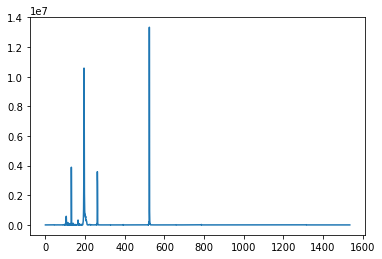

In [6]:
# fft, but using PSD
from scipy import fft

samples = len(data)

# fourier transform
fhat = fft.fft(wf)
PSD = (fhat * np.conj(fhat))
freq = fft.fftfreq(samples, 1 / sample_rate)
pos_freq = freq[freq >= 0]
pos_PSD = PSD[freq >= 0]

plt.plot(pos_freq[:5000], pos_PSD[:5000]);
plt.plot()

# # find max
# print(pos_freq[np.argmax(pos_PSD)])

# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
max_freqs = pos_freq[pos_PSD.argsort()[-100:][::-1]]
print(list(map(get_note, max_freqs)))

# Method 2: Spectrogram

Most of the adjustments here comes from working around the frequency vs time uncertainty principle, although it is also worth testing out functions other than a simple Gaussian for the convolution.

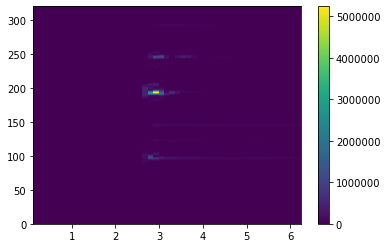

(606, 22)
193.92000000000002 2.875 G3
freq spacing: 0.32
time spacing: 0.25


In [12]:
from scipy import signal
f, t, Sxx = signal.spectrogram(wf, sample_rate, noverlap=2000, nperseg=4000, nfft=50000)
plt.pcolormesh(t, f[:1000], Sxx[:1000, :])
plt.colorbar()
plt.show()
max_idx = np.unravel_index(Sxx.argmax(), Sxx.shape)
print(max_idx)
print(f[max_idx[0]], t[max_idx[1]], get_note(f[max_idx[0]]))
print(f'freq spacing: {f[1]}')
print(f'time spacing: {t[1]}')

In [13]:
# probably not worth pursuing

from scipy import linalg

# should def truncate before svd for efficiency, but thats a problem for later
U, S, Vt = linalg.svd(Sxx[:1000])

max_freqs = f[U[:, 0].argsort()[-10:][::-1]]
print(U[:, 0].argsort()[-10:][::-1])
print(list(map(get_note, max_freqs)))

test = U[:, :1] @ np.diag(S[:1]) @ Vt[:1]
max_idx = np.unravel_index(test.argmax(), test.shape)
print(f[max_idx[0]], t[max_idx[1]], get_note(f[max_idx[0]]))

# maybe try some extra filtering. Before, though, let's test out a wavelet transform 
#print(U[:, 0])

[28 42 41 43 14 29 56 55 57 44]
['C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'D0', 'C#0/Db0', 'D0', 'C0']
193.6 2.875 G3


# Method 3: Some kinda wavelet transform

In [ ]:
from scipy import signal

